# Initial Package/Data Load

In [ ]:
!pip install datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 988.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 731.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 830.1 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from timeit import time
import sklearn.metrics as metrics
from sklearn.utils import resample
from tqdm import tqdm
import gc
from datasets import Dataset

In [ ]:
output_prefix = 'dissertation'

if output_prefix == '':
    raise(ValueError('Please specify output root'))

In [ ]:
google_colab = True
data_path = ''

if google_colab == True:
    #for colab
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    df = pd.read_csv('/content/drive/MyDrive/dissertation_data/MLdata.csv')
else:
    df = pd.read_csv(data_path)


Mounted at /content/drive


In [ ]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train


# Basic Data Manipulation

In [ ]:
#concatenate responses
df['Response'] = df['open_ended_1'] + df['open_ended_2'] + df['open_ended_3'] + df['open_ended_4'] + df['open_ended_5']

In [ ]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ..."
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...


In [ ]:
df[1080:1089]

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response
1080,10440169865,I would allow my colleague to take the vacatio...,I would put all my efforts in my current proje...,I would persuade my colleague to go but if uns...,I would be in a dilemma of facing my manager r...,i would find it both enjoyable and boring in t...,4.333333,4.416667,4.500000,4.750000,2.000000,Train,I would allow my colleague to take the vacatio...
1081,10440130668,I would oblige to working the same week we bot...,I would take a couple days to complete this pr...,I would still go regardless if my colleague go...,I would request a meeting with my manager. Th...,I would find this experience very enjoyable. ...,3.416667,4.666667,4.500000,4.083333,1.333333,Train,I would oblige to working the same week we bot...
1082,10459907870,I would try to change my time if it was not so...,I would try to get as much done as possible ea...,I would not go because I am very introverted. ...,I would ask for a meeting with the supervisor ...,I would find it enjoyable and exciting. I lik...,3.416667,3.250000,3.500000,4.833333,2.750000,Train,I would try to change my time if it was not so...
1083,10459662418,I would change it. Unless they have been on va...,I would message them about my upcoming project...,I would try my best to think of ways to make t...,Not really sure how to handle this one. Refusi...,I think it would be awesome. The one thing tha...,2.500000,4.250000,4.250000,2.250000,4.333333,Train,I would change it. Unless they have been on va...
1084,10440108945,I would change my plans. I would try to do thi...,I would try to do as much work as I could on i...,I would encourage my colleague to go with me. ...,I would feel very bad and angry in this situat...,I would find this enjoyable. I think that it w...,3.000000,2.833333,2.916667,3.500000,3.083333,Train,I would change my plans. I would try to do thi...
1085,10459998084,I would meet with my colleague and discuss the...,I would begin on the project right away and co...,I would attend the gathering regardless of the...,I would feel very upset and uncomfortable in t...,I would find this experience very enjoyable an...,3.833333,3.083333,4.916667,5.000000,1.750000,Train,I would meet with my colleague and discuss the...
1086,10463035379,I would change my plan simply to show the supe...,I would take it on with zero complaints. I wou...,I would go with zero reservations or issues. I...,I would make it a point to say my peace to him...,I would find this extremly enjoyable how can o...,4.500000,3.833333,3.416667,4.833333,1.000000,Train,I would change my plan simply to show the supe...
1087,10459788032,I would change to keep the peace and look like...,I would show my boss that I am handling the pr...,I would ask the client to please go. I would e...,I would feel bad and hurt.I would ask my boss ...,I would find this experience very enjoyable an...,2.750000,2.916667,3.416667,3.333333,3.666667,Train,I would change to keep the peace and look like...
1088,10460010474,I would look into changing my vacation plans t...,I would work on the project little by little d...,I would probably still go. Just depending on h...,I would see what I could to do to improve the ...,I would absolutely enjoy being involved in thi...,3.833333,4.666667,4.416667,4.583333,1.583333,Dev,I would look into changing my vacation plans t...


# Exploratory Data Analysis

In [ ]:
#length
len(df)

1688

In [ ]:
len(df.loc[df.Dataset == 'Dev'])

300

In [ ]:
len(df.loc[df.Dataset == 'Test'])

300

In [ ]:
df.dtypes

Respondent_ID         int64
open_ended_1         object
open_ended_2         object
open_ended_3         object
open_ended_4         object
open_ended_5         object
E_Scale_score       float64
A_Scale_score       float64
O_Scale_score       float64
C_Scale_score       float64
N_Scale_score       float64
Dataset              object
Response             object
Cleaned_response     object
dtype: object

In [ ]:
#check average string length
res = [x for x in df['Response']]
length = [len(ele) for ele in res]
result = 0 if len(length) == 0 else (float(sum(length)) / len(length))
print("The Average length of String in list is : " + str(result))

The Average length of String in list is : 1288.4644549763034


In [ ]:
round(df[['E_Scale_score','A_Scale_score','O_Scale_score','C_Scale_score','N_Scale_score']].describe(), 2)

,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score
count,1688.00,1688.00,1688.00,1688.00,1688.00
mean,3.49,4.12,3.86,4.40,2.07
std,0.79,0.61,0.71,0.59,0.76
min,1.00,1.33,1.17,1.00,1.00
25%,3.00,3.75,3.42,4.08,1.50
50%,3.50,4.17,3.92,4.58,2.00
75%,4.08,4.58,4.42,4.92,2.58
max,5.00,5.00,5.00,5.00,4.83


In [ ]:
from google.colab import files

descriptives = round(df[['E_Scale_score','A_Scale_score','O_Scale_score','C_Scale_score','N_Scale_score']].describe(), 2)
descriptives.to_csv(f"{output_prefix}_descriptives.csv")
files.download(f"{output_prefix}_descriptives.csv")

print('Downloaded')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded


# Text Cleaning for Bag of Words

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#set stop words
stop_words = set(stopwords.words('english'))
#set lemmatizer
ps = PorterStemmer()

def clean_text(text):
    """

    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers
    4. Removes stop words
    5. Lemmatizes text

    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])
    text = " ".join([w for w in text.split() if w not in stop_words])
    text = " ".join([ps.stem(w) for w in text.split()])

    return text

In [ ]:
df['Cleaned_response'] = df['Response'].apply(clean_text)

In [ ]:
df.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ...",would chang vacat week better employe work tim...
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...,would talk colleagu see will chang vacat date ...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...,would feel upset perhap alreadi book someth we...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...,would suggest whoever request time first given...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...,would talk colleagu see reserv would tri chang...


In [ ]:
df['Cleaned_response'][0]

'would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris'

# Train/Test Data Creation

In [ ]:
#concatenate eval and train dataset
train = df.loc[df.Dataset == 'Train']
train.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
0,10446116527,"I would change my vacation week, because I am ...",I would reach out to my boss and ask him or he...,I would not go. I am a not a social person. I ...,I would ask my manager why he/she gave me such...,I would find this experience super enjoyable. ...,2.250000,3.750000,3.166667,3.750000,2.916667,Train,"I would change my vacation week, because I am ...",would chang vacat week better employe work tim...
1,10440100535,I would talk to my colleague and see if they w...,I would continue to work on the project that w...,I would talk to my colleague and try to talk t...,I would feel upset about the negative feedback...,I would find this experience enjoyable. I feel...,4.666667,4.416667,4.583333,5.000000,1.333333,Train,I would talk to my colleague and see if they w...,would talk colleagu see will chang vacat date ...
2,10462850071,I would feel upset because perhaps I already b...,I would start working on the project now and g...,I would feel guilty about thinking about not g...,I would feel really defensive about it. I woul...,I would find it enjoyable because I would be r...,2.250000,4.750000,4.083333,4.666667,2.166667,Train,I would feel upset because perhaps I already b...,would feel upset perhap alreadi book someth we...
3,10460008027,I would suggest that whoever requested the tim...,I would try to finish early because it's alway...,"I wouldn't want to go, but I'd have to weigh t...",I would first wait until I'm calm. Then I wou...,I would love to have the opportunity to learn ...,2.916667,4.083333,3.916667,4.916667,1.333333,Train,I would suggest that whoever requested the tim...,would suggest whoever request time first given...
4,10459746373,I would talk to my colleague to see if he has ...,I would remind my boss that I am working on th...,I would go anyway. Networking is a good way to...,I would talk to my manager first and get some ...,I would find this experience enjoyable as I am...,3.750000,4.750000,3.666667,4.916667,1.583333,Train,I would talk to my colleague to see if he has ...,would talk colleagu see reserv would tri chang...


In [ ]:
#Training variables

y_train = train['Response']
y_E_train = train['E_Scale_score']
y_A_train = train['A_Scale_score']
y_O_train = train['O_Scale_score']
y_C_train = train['C_Scale_score']
y_N_train = train['N_Scale_score']

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

In [ ]:
test = df.loc[df.Dataset == 'Test']
test.head()

,Respondent_ID,open_ended_1,open_ended_2,open_ended_3,open_ended_4,open_ended_5,E_Scale_score,A_Scale_score,O_Scale_score,C_Scale_score,N_Scale_score,Dataset,Response,Cleaned_response
1388,10440136230,I would re-schedule my vacation time because I...,I would start on the project as soon as possib...,I would go by myself or convince my colleague ...,I do not feel good about the situation. I woul...,I would find this experience enjoyable. I like...,3.000000,4.333333,4.166667,4.166667,2.333333,Test,I would re-schedule my vacation time because I...,would schedul vacat time think would reflect p...
1389,10459740644,I would likely complain privately to someone o...,I would start working on my project during all...,I want to make sure that my personal life is n...,I would be very upset particularly if the cons...,I would be very interested in learning about N...,2.916667,3.500000,3.750000,4.250000,1.666667,Test,I would likely complain privately to someone o...,would like complain privat someon outsid colle...
1390,10446110785,I would most likely be willing to change. I am...,I would start immediately. I am not a procrast...,I would take the time and go. I would stay for...,"I would feel scared, anxious, frustrated and a...",I would find this experience enjoyable. I love...,3.333333,4.166667,3.583333,5.000000,1.500000,Test,I would most likely be willing to change. I am...,would like will chang flexibl person feel othe...
1391,10446118106,I would give my partner the vacation week. I w...,I will tell my boss in a gentle yet firm way t...,I would understand my client and not force the...,I would ask my boss to discuss this important ...,I would find this enjoyable. Norway is one of ...,2.833333,4.000000,4.000000,4.500000,1.666667,Test,I would give my partner the vacation week. I w...,would give partner vacat week say like caus qu...
1392,10460409624,It would depend on the plans made for my trip....,I would attempt to finish the project before t...,"If I am looking to advance in my career, then ...",I would not be happy. I would listen to my man...,I would not volunteer to get involved on the p...,2.916667,4.583333,3.500000,4.583333,1.916667,Test,It would depend on the plans made for my trip....,would depend plan made trip alreadi book fligh...


In [ ]:
#test variables
x_test = test['Response']
y_E_test = test['E_Scale_score']
y_A_test = test['A_Scale_score']
y_O_test = test['O_Scale_score']
y_C_test = test['C_Scale_score']
y_N_test = test['N_Scale_score']

#create list of output variables
#e,a,o,c,n

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

# Bag of Words Feature Vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#list comprehension to create list of docs
train_documents = [x for x in train['Cleaned_response']]
test_documents = [x for x in test['Cleaned_response']]

In [ ]:
documents[0]

'would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris'

In [ ]:
documents[0:2]

['would chang vacat week better employe work time peopl work would suffer selfish also employe even boss kind owe would reach boss ask need get start project would begin project ahead time sinc boss gonna add crap onto anyway hope earlier show result would go social person well crowd get social anxieti would ask manag gave feedback although may agre believ true mayb wrong would ask manag need correct wrong everyth bs though hate job may quit would find experi super enjoy love learn differ cultur languag minor japanes would devot lot time studi norway even ask compani send opportun aris',
 'would talk colleagu see will chang vacat date realli need week colleagu will chang would go talk boss would explain boss would still like week request possibl take week would like think would make easier would want start workplac conflict vacat weeki would continu work project due anoth task came thought could complet time manner without affect primari task would work would strive complet primari tas

In [ ]:
#vectorizer, extract unigrams and bigrams
#max df remove words occuring in more than x% of documents
#min df remove words occuring less than x%
#x max features

# vectorizer = CountVectorizer(max_df = 0.4, ngram_range = (1,2), min_df = 0.02, max_features = 5000)

vectorizer = CountVectorizer(ngram_range = (1,1))

In [ ]:
#create vectors, #default is by unigram
bow = vectorizer.fit_transform(train_documents)

In [ ]:
bow.shape

(1088, 3844)

In [ ]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#dictionary of words and indices
#vectorizer.vocabulary_

In [ ]:
#convert to dataframe
import scipy.sparse
from pandas import DataFrame

In [ ]:
bow_x_train = pd.DataFrame.sparse.from_spmatrix(bow)

In [ ]:
#calculate sparseness out of curiousity
round((bow_df.to_numpy() == 0).mean(), 4)

0.9791

# Bag of Words train/test resplit

In [ ]:
#verify length
print(len(bow_x_train))
print(len(bow_x_train) == len(train))

1088
True


In [ ]:
bow_x_test = pd.DataFrame.sparse.from_spmatrix(vectorizer.transform(test_documents))

In [ ]:
print(len(bow_x_test))
print(len(bow_x_test) == len(test))

300
True


# Bag of Words Model Training/Testing

In [ ]:
# !pip install xgboost

In [ ]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import sklearn.metrics as metrics
from scipy.stats import pearsonr
from sklearn.exceptions import ConvergenceWarning

In [ ]:
def regression_grid_train_test_report(model, x_train, y_train, x_test, y_test, paramater_grid, cv, score):


    """

    """
    global frame

    #start timer
    start = time.time()


    print('\n Performing grid search....hold tight... \n =============================')

    model_name = model
    construct = y_test.name

    ###### grid search

    #construct grid search
    #number of parameter settings set to 60
    gs = RandomizedSearchCV(model, param_distributions = paramater_grid, scoring = score, cv = cv, n_iter = 60, random_state = 152)


    #fit on training data
    gs.fit(x_train, y_train)
    best_parameters = gs.best_params_
    best_estimator = gs.best_estimator_


    print('Grid Search Complete')
    print('==================================')

    ##### predict on test data
    y_pred = best_estimator.predict(x_test)

    ###### regression report

    print(f'Outcome Variable: {construct}')


    #number of grid search combinations


    n_iterations = 1

    for value in paramater_grid.values():
        n_iterations *= len(value)


    print(f'Number of original grid search combinations: {n_iterations}')


    print(f'Best parameters for {model_name} were {best_parameters}')


    print('\n Results Below')

    # mse=metrics.mean_squared_error(y_test, y_pred)
    # print('MSE: ', round(mse,4))

    r = pearsonr(y_test, y_pred)
    print('r: ', r)

    print()
    print('==================================')

    #create global variable to access it out of function

    #results data frame

    frame = pd.DataFrame([[construct, model_name, r[0]]],columns=['construct', 'model_name', 'r'])

    end = time.time()

    time_elapsed = (end - start) / 60

    print(f'Time Elapsed: {time_elapsed} minutes')

    print('\n \n \n Analysis Complete')

    return frame, r[0]

### Grid search

In [ ]:
#consider using randomized grid search

#configure models

enet = ElasticNet()

#parameter grids

enet_param_grid = {
                    'alpha': np.linspace(0.1, 1, 10),
                    'l1_ratio': np.arange(0.1, 1.0, 0.1)}

#create list of parameter grids for iterations

models = [enet]
param_grids = [enet_param_grid]

In [ ]:
#ignore elastic net convergence warnings

from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Modeling

In [ ]:
!pip install caffeine --quiet

In [ ]:
#create nested for loop that train all models and all outcomes
#two models
#two parameter grids
#five outcome variables

for i in range(0, len(y_train_list)):
    for x in range(0, len(models)):
        print(i,x, x)

0 0 0
1 0 0
2 0 0
3 0 0
4 0 0


In [ ]:
results = []
corrs = []

for i in tqdm(range(0, len(y_train_list))):
  frame, r = regression_grid_train_test_report(enet, bow_x_train, y_train_list[i], bow_x_test, y_test_list[i], enet_param_grid, 10, 'explained_variance')
  results.append(frame)
  corrs.append(r)

bow_all_output = pd.concat(results)

bow_all_output.to_csv(path_or_buf = f"{output_prefix}_bow_full_output.csv")
files.download(f"{output_prefix}_bow_full_output.csv")

  0%|          | 0/5 [00:00<?, ?it/s]


 Performing grid search....hold tight... 


 20%|██        | 1/5 [14:52<59:31, 892.97s/it]

Grid Search Complete
Outcome Variable: E_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.1, 'alpha': 0.2}

 Results Below
r:  PearsonRResult(statistic=0.20076723209710848, pvalue=0.00046777491858321867)

Time Elapsed: 14.882789552211761 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 40%|████      | 2/5 [29:28<44:07, 882.57s/it]

Grid Search Complete
Outcome Variable: A_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.1, 'alpha': 0.2}

 Results Below
r:  PearsonRResult(statistic=0.18608903618329845, pvalue=0.001203581634112234)

Time Elapsed: 14.588261171181996 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 60%|██████    | 3/5 [44:08<29:22, 881.29s/it]

Grid Search Complete
Outcome Variable: O_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.30000000000000004, 'alpha': 0.1}

 Results Below
r:  PearsonRResult(statistic=0.0897732045270282, pvalue=0.12076740076876209)

Time Elapsed: 14.662675722440083 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 80%|████████  | 4/5 [58:32<14:34, 874.67s/it]

Grid Search Complete
Outcome Variable: C_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.2, 'alpha': 0.1}

 Results Below
r:  PearsonRResult(statistic=0.19407409564539618, pvalue=0.0007258667800647109)

Time Elapsed: 14.408829470475515 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


100%|██████████| 5/5 [1:12:58<00:00, 875.67s/it]

Grid Search Complete
Outcome Variable: N_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.1, 'alpha': 0.2}

 Results Below
r:  PearsonRResult(statistic=0.23182928020138713, pvalue=5.03485429806894e-05)

Time Elapsed: 14.429426391919455 minutes

 
 
 Analysis Complete


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Empath

In [ ]:
!pip install empath --quiet

In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
empath_x_train_list = [x for x in train['Response']]
empath_x_test_list = [x for x in test['Response']]

In [ ]:
list_of_empath = []
for x in empath_x_train_list:
    empath = lexicon.analyze(x)
    list_of_empath.append(empath)

In [ ]:
empath_x_train = pd.DataFrame(list_of_empath)

In [ ]:
empath_x_train.head(10)

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
1,0.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0
2,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0
3,0.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
4,0.0,4.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
5,0.0,3.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,0.0
6,1.0,5.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0
7,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
8,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9,5.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
len(empath_x_train)

1088

In [ ]:
list_of_empath = []
for x in empath_x_test_list:
    empath = lexicon.analyze(x)
    list_of_empath.append(empath)

empath_x_test = pd.DataFrame(list_of_empath)
print(len(empath_x_test))

300


In [ ]:
empath_x_test.head(10)

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,4.0,6.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,0.0
1,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,4.0,0.0
3,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0
4,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
5,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,1.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
8,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
9,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0


# Fit Empath Algorithms

In [ ]:
#create list of output variables
#e,a,o,c,n

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

In [ ]:
#run function across different models and parameter grids in my list, append to dfs

results_empath = []

for i in tqdm(range(0, len(y_train_list))):
    frame, r = regression_grid_train_test_report(enet, empath_x_train, y_train_list[i], empath_x_test, y_test_list[i], enet_param_grid, 10, 'explained_variance')
    results_empath.append(frame)


  0%|          | 0/5 [00:00<?, ?it/s]


 Performing grid search....hold tight... 


 20%|██        | 1/5 [00:15<01:00, 15.16s/it]

Grid Search Complete
Outcome Variable: E_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.1, 'alpha': 0.2}

 Results Below
r:  PearsonRResult(statistic=0.06803849438156802, pvalue=0.2400333089547622)

Time Elapsed: 0.25262258052825926 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 40%|████      | 2/5 [00:31<00:46, 15.60s/it]

Grid Search Complete
Outcome Variable: A_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.2, 'alpha': 0.1}

 Results Below
r:  PearsonRResult(statistic=0.1290697971830719, pvalue=0.02537925346610713)

Time Elapsed: 0.26508068641026816 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 60%|██████    | 3/5 [00:49<00:33, 16.85s/it]

Grid Search Complete
Outcome Variable: O_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.1, 'alpha': 0.2}

 Results Below
r:  PearsonRResult(statistic=0.13430681304801345, pvalue=0.019959741080321794)

Time Elapsed: 0.30569455623626707 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


 80%|████████  | 4/5 [01:03<00:15, 15.71s/it]

Grid Search Complete
Outcome Variable: C_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.5, 'alpha': 0.1}

 Results Below
r:  PearsonRResult(statistic=0.04771136323728078, pvalue=0.4102781779228959)

Time Elapsed: 0.23237919807434082 minutes

 
 
 Analysis Complete

 Performing grid search....hold tight... 


100%|██████████| 5/5 [01:15<00:00, 15.09s/it]

Grid Search Complete
Outcome Variable: N_Scale_score
Number of original grid search combinations: 90
Best parameters for ElasticNet() were {'l1_ratio': 0.6, 'alpha': 0.1}

 Results Below
r:  PearsonRResult(statistic=0.05877547562733518, pvalue=0.3102733599050563)

Time Elapsed: 0.20068275928497314 minutes

 
 
 Analysis Complete


In [ ]:
empath_all_output = pd.concat(results_empath)

empath_all_output.to_csv(path_or_buf = f"{output_prefix}_empath_results.csv")
files.download(f"{output_prefix}_empath_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM

In [ ]:
#!pip install gensim
%pip install keras

In [ ]:
import gensim.downloader as api
from keras.layers import Bidirectional
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.initializers import Constant
from keras.constraints import maxnorm
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import regularizers
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#clean text for lstm

import re
import nltk

def clean_text2(text):
    """
    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers

    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])

    return text

In [ ]:
df['lstm_text'] = df['Response'].apply(clean_text2)

In [ ]:
lstm_train = df.loc[df.Dataset == 'Train']
lstm_test = df.loc[df.Dataset == 'Test']

lstm_x_train = lstm_train['lstm_text']
lstm_x_test = lstm_test['lstm_text']

In [ ]:
#check vocabulary size
from collections import Counter
results = Counter()
df['lstm_text'].str.lower().str.split().apply(results.update)
print(f'length of results: {len(results)}')

#set vocabulary size and embedding size
voc_size = len(results)

#check for longest length for padding purposes
list = [x for x in df['lstm_text']]
longest = max(list, key = len)
max_length = len(longest)
print(f' max length is: {max_length}')

#unique responses
unique = set([x for x in df['lstm_text']])
print(f'length of unique: {len(unique)}')


#tokenize
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(lstm_x_train)


#pad
sequences = tokenizer.texts_to_sequences(lstm_x_train.values)
lstm_x_train = pad_sequences(sequences,maxlen=max_length)

print(f'x_train shape is : {lstm_x_train.shape}')

#tokenize
tokenizer.fit_on_texts(lstm_x_test)

#pad
test_sequences = tokenizer.texts_to_sequences(lstm_x_test.values)
lstm_x_test = pad_sequences(test_sequences,maxlen=max_length)

print(f'x_test shape is : {lstm_x_test.shape}')

length of results: 7215
 max length is: 4228
length of unique: 1687
x_train shape is : (1088, 4228)
x_test shape is : (300, 4228)


In [ ]:
#check indices
tokenizer.word_index

{'i': 1,
 'would': 2,
 'to': 3,
 'the': 4,
 'my': 5,
 'and': 6,
 'it': 7,
 'a': 8,
 'if': 9,
 'that': 10,
 'be': 11,
 'of': 12,
 'this': 13,
 'not': 14,
 'in': 15,
 'for': 16,
 'with': 17,
 'is': 18,
 'me': 19,
 'go': 20,
 'as': 21,
 'on': 22,
 't': 23,
 'have': 24,
 'about': 25,
 'time': 26,
 'work': 27,
 'project': 28,
 'try': 29,
 'do': 30,
 'could': 31,
 'vacation': 32,
 'get': 33,
 'boss': 34,
 'colleague': 35,
 'find': 36,
 'make': 37,
 'was': 38,
 'at': 39,
 'also': 40,
 'so': 41,
 'they': 42,
 'or': 43,
 'feedback': 44,
 'manager': 45,
 'ask': 46,
 'there': 47,
 'change': 48,
 'can': 49,
 'them': 50,
 'then': 51,
 'meeting': 52,
 'new': 53,
 'will': 54,
 'up': 55,
 'like': 56,
 'take': 57,
 'more': 58,
 'plans': 59,
 'know': 60,
 'but': 61,
 'because': 62,
 'feel': 63,
 'out': 64,
 'other': 65,
 'first': 66,
 'want': 67,
 'enjoyable': 68,
 's': 69,
 'what': 70,
 'week': 71,
 'an': 72,
 'last': 73,
 'learn': 74,
 'am': 75,
 'experience': 76,
 'think': 77,
 'way': 78,
 'their': 7

In [ ]:
print(lstm_x_train)

[[   0    0    0 ...    4  101 1227]
 [   0    0    0 ...    2   11  228]
 [   0    0    0 ...  273   80  124]
 ...
 [   0    0    0 ...   15    4  162]
 [   0    0    0 ...  136   15  129]
 [   0    0    0 ...   55   53 1260]]


In [ ]:
print(lstm_x_test)

[[  0   0   0 ...  28  18 150]
 [  0   0   0 ...  11 882 222]
 [  0   0   0 ...  15   4 170]
 ...
 [  0   0   0 ...  25   4 146]
 [  0   0   0 ... 320  15 344]
 [  0   0   0 ...  15   4  28]]


# Pre-trained Word Embeddings

In [ ]:
!python -m spacy download en_core_web_md
import en_core_web_md

2023-08-14 22:42:49.787841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 21.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp = en_core_web_md.load()

In [ ]:
test_word = nlp('Hello World')
for token in test_word:
    print(len(token.vector))

300
300


In [ ]:
embedding_dim = 300

In [ ]:
embedding_matrix = np.zeros((voc_size, embedding_dim))

In [ ]:
#append word vectors in vocabulary to embedding matrix
for i, word in enumerate(tokenizer.word_index):
    embedding_matrix[i] = nlp(word).vector

In [ ]:
#check
embedding_matrix[0]

array([  2.13870001,  -2.89310002,  -2.99799991,  -9.58860016,
       -14.66100025,  -1.74849999,  -0.31448999,   5.6111002 ,
       -11.31999969,   9.24880028,   1.63059998,   5.59149981,
        -8.72490025,   4.92770004,  -0.87151998,  -8.15480042,
         3.49679995,  -4.22249985,  -7.01039982, -10.97900009,
         7.34060001,   4.88250017,  -7.29139996,  -0.70134002,
        -5.09730005,  -6.68470001,   0.79904002,  -0.062886  ,
        -6.70230007,   6.00509977,  -5.48799992,  -5.16860008,
        -6.28679991,  15.34700012,  11.28299999,   1.38689995,
        -5.45800018,   1.9095    ,   7.47559977,  -3.04500008,
         0.79273999,  -0.37955001,   4.14669991, -10.01900005,
        11.51500034,   6.54320002,  -9.01749992,  -5.8828001 ,
        -4.60179996,   5.12010002,   6.57929993,  -8.35499954,
        -3.60030007,   1.09089994, -12.82699966,  -2.48210001,
         1.87179995,  10.51099968,   4.71400023,   2.4928    ,
        20.35099983,  -2.57690001, -14.68799973,  -3.38

In [ ]:
test_vec = nlp('i')

test_vec.vector == embedding_matrix[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
embedding_matrix.shape

(7215, 300)

In [ ]:
#create list of output variables
#e,a,o,c,n

y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]

y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

## Embedding Layer

In [ ]:
#Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
Embedding_layer= Embedding(input_dim = voc_size, output_dim = embedding_dim,
weights = [embedding_matrix],
input_length = max_length,
trainable=False)

# LSTM

In [ ]:
model = Sequential()
model.add(Embedding_layer)
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4228, 300)         2164500   
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 2,886,001
Trainable params: 721,501
Non-trainable params: 2,164,500
_________________________________________________________________
None


Epoch 1/2
31/31 [==============================] - 6s 203ms/step - loss: 0.6861 - val_loss: 1.6346
Epoch 2/2
10/10 [==============================] - 1s 93ms/step

Training Performance


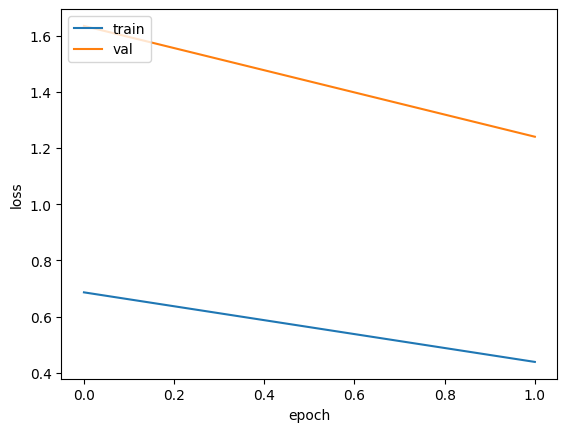


 Results Below
r:  0.0172
Epoch 1/2
31/31 [==============================] - 9s 280ms/step - loss: 0.4578 - val_loss: 0.4838
Epoch 2/2
10/10 [==============================] - 1s 92ms/step

Training Performance


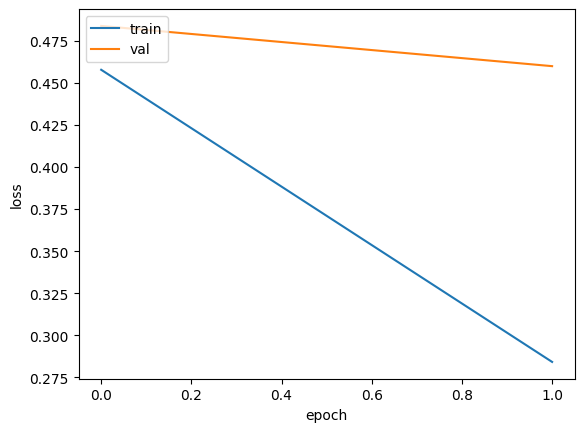


 Results Below
r:  0.0431
Epoch 1/2
31/31 [==============================] - 7s 220ms/step - loss: 0.4472 - val_loss: 0.6071
Epoch 2/2
10/10 [==============================] - 1s 93ms/step

Training Performance


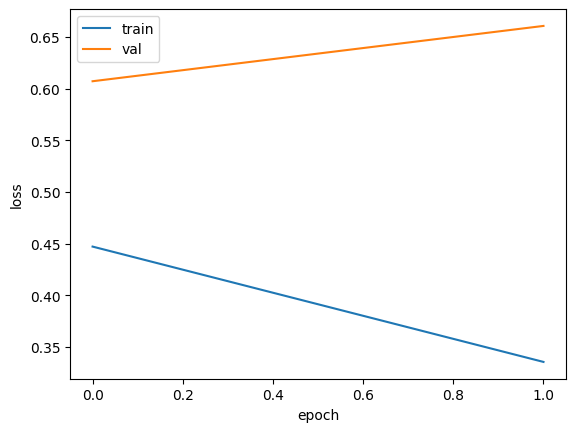


 Results Below
r:  0.0954
Epoch 1/2
31/31 [==============================] - 7s 219ms/step - loss: 0.4448 - val_loss: 0.4520
Epoch 2/2
10/10 [==============================] - 1s 81ms/step

Training Performance


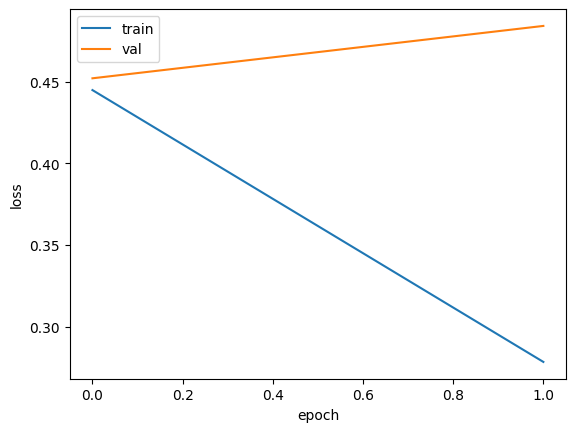


 Results Below
r:  0.0302
Epoch 1/2
31/31 [==============================] - 6s 204ms/step - loss: 1.5514 - val_loss: 0.7361
Epoch 2/2
10/10 [==============================] - 1s 127ms/step

Training Performance


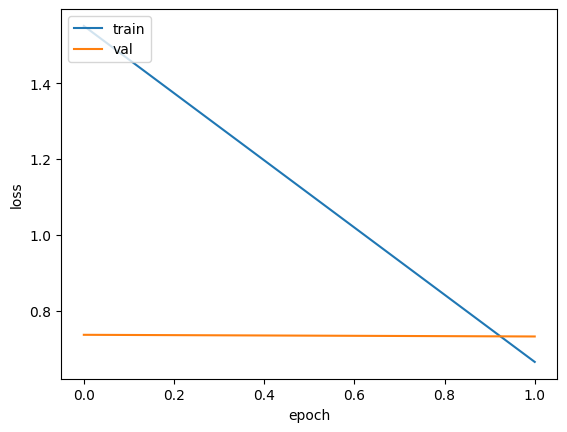


 Results Below
r:  -0.0285


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pandas import DataFrame
from google.colab import files

#training loop
#can handle multiple outcome varaibles and a single model setting

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

cor = []

for i in range(0, len(y_train_list)):
  history = model.fit(lstm_x_train, y_train_list[i], epochs=2, batch_size = 32, validation_split = 0.1)
  y_pred = model.predict(lstm_x_test)

  print()
  print('Training Performance')
  print('=======================================')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()




  print('\n Results Below')
  print('=======================================')

  y_flat = y_pred.flatten()
  r = stats.pearsonr(y_test_list[i], y_flat)

  print('r: ', round(r[0],4))
  cor.append(r)


lstm_results = pd.DataFrame(columns = ['r'])
lstm_results['r'] = cor

lstm_results.to_csv(f"{output_prefix}_lstm_output.csv")
files.download(f"{output_prefix}_lstm_output.csv")


# Big Bird

# Dataset Creation

In [ ]:
!pip install transformers[torch] --quiet
!pip install sentencepiece --quiet
from transformers import TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
#prepare train data
e_bert_train_df = train[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
a_bert_train_df = train[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
o_bert_train_df = train[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
c_bert_train_df = train[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
n_bert_train_df = train[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})

bert_train_list = [e_bert_train_df, a_bert_train_df, o_bert_train_df, c_bert_train_df, n_bert_train_df]

In [ ]:
e_bert_test_df = test[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
a_bert_test_df = test[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
o_bert_test_df = test[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
c_bert_test_df = test[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
n_bert_test_df = test[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})

bert_test_list = [e_bert_test_df, a_bert_test_df, o_bert_test_df, c_bert_test_df, n_bert_test_df]

In [ ]:
def compute_metrics(eval_preds):

    """
    Compute correlation

    Args:
        eval_preds (EvalPrediction): The evaluation predictions from the Trainer.

    Returns:
        dict: Dictionary containing the computed metrics.
    """
    preds, labels = eval_preds.predictions, eval_preds.label_ids
    preds = np.squeeze(preds)  # Remove unnecessary dimensions

    # Calculate Pearson correlation coefficient
    correlation = np.corrcoef(preds, labels)[0, 1]

    # Return the metrics as a dictionary
    return {
        'correlation': correlation,
    }


def transformer(model, tokenizer, train_dataset, test_dataset, max_length = 4096, num_layers_to_freeze = 8, freeze = False):

    train_dataset = Dataset.from_pandas(train_dataset)
    test_dataset = Dataset.from_pandas(test_dataset)

    tokenizer = AutoTokenizer.from_pretrained(tokenizer)
    model = AutoModelForSequenceClassification.from_pretrained(model, num_labels=1)

    if freeze or num_layers_to_freeze > 0:
      # Freeze the specified number of layers
      for layer_idx in range(num_layers_to_freeze):
          for param in model.bert.encoder.layer[layer_idx].parameters():
              param.requires_grad = False

      num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
      print(f"Number of trainable parameters: {num_trainable_params}")

    def tokenize_function(examples, tokenizer):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=max_length)

    train_dataset = train_dataset.map(
      lambda examples: tokenize_function(examples, tokenizer),
      batched=True,
      remove_columns=["text"],
  )

    test_dataset = test_dataset.map(
        lambda examples: tokenize_function(examples, tokenizer),
        batched=True,
        remove_columns=["text"],
  )

    # Define Trainer
    training_args = TrainingArguments(
        output_dir='./results',
        do_eval = False,
        save_total_limit=2,
        learning_rate=2e-5,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=8,
        num_train_epochs=5,
        fp16 = True,
        logging_dir='./logs',
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        compute_metrics = compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate on the test set using the compute_metrics function
    test_results = trainer.evaluate(test_dataset)

    print("Test results:", test_results)

    del model

    return test_results

def multi_transformer(train_datasets: list, test_datasets: list, model, tokenizer):
    evaluation_results = []

    for train, test in zip(train_datasets, test_datasets):
        test_results = transformer(model, tokenizer, train, test, max_length = 4096)
        evaluation_results.append(test_results)
        torch.cuda.empty_cache()

    df = pd.DataFrame(evaluation_results)
    df.to_csv(f"{output_prefix}_transformer_results.csv", index=False)
    files.download(f"{output_prefix}_transformer_results.csv")


# Train Models

In [ ]:
from transformers import Trainer
import torch
from google.colab import files

torch.cuda.empty_cache()

config = {

    'model': "google/bigbird-roberta-base",
    'tokenizer': "google/bigbird-roberta-base"
}

multi_transformer(bert_train_list, bert_test_list, config['model'],  config['model'])

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of trainable parameters: 71357185


Map:   0%|          | 0/1088 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

OutOfMemoryError: ignored

# Ensemble Prep

In [ ]:
!pip install empath --quiet
!python -m spacy download en_core_web_md
!pip install transformers[torch] --quiet
!pip install sentencepiece --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 36.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
from pandas import DataFrame
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import sklearn.metrics as metrics
from scipy.stats import pearsonr
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
import joblib

from empath import Empath


warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
import gensim.downloader as api
from keras.layers import Bidirectional
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Dropout
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import regularizers
from scipy import stats
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from collections import Counter
import en_core_web_md
nlp = en_core_web_md.load()

In [ ]:
from transformers import TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import torch
from google.colab import files

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
enet = ElasticNet()

#parameter grids
enet_param_grid = {
                    'alpha': np.linspace(0.1, 1, 10),
                    'l1_ratio': np.arange(0.1, 1.0, 0.1)}

#create list of parameter grids for iterations
models = [enet]
param_grids = [enet_param_grid]

In [ ]:
config = {

    'model': "google/bigbird-roberta-base",
    'tokenizer': "google/bigbird-roberta-base"
}

In [ ]:
def prepare_train_test_data(df):

  #concatenate eval and train dataset
  train = df.loc[df.Dataset == 'Train']
  y_train = train['Response']
  y_E_train = train['E_Scale_score']
  y_A_train = train['A_Scale_score']
  y_O_train = train['O_Scale_score']
  y_C_train = train['C_Scale_score']
  y_N_train = train['N_Scale_score']

  y_train_list = [y_E_train, y_A_train, y_O_train, y_C_train, y_N_train]


  #concatenate eval and train dataset
  valid = df.loc[df.Dataset == 'Dev']
  y_val = valid['Response']
  y_E_val = valid['E_Scale_score']
  y_A_val = valid['A_Scale_score']
  y_O_val = valid['O_Scale_score']
  y_C_val = valid['C_Scale_score']
  y_N_val = valid['N_Scale_score']

  y_val_list = [y_E_val, y_A_val, y_O_val, y_C_val, y_N_val]

  test = df.loc[df.Dataset == 'Test']
  #test variables
  x_test = test['Response']
  y_E_test = test['E_Scale_score']
  y_A_test = test['A_Scale_score']
  y_O_test = test['O_Scale_score']
  y_C_test = test['C_Scale_score']
  y_N_test = test['N_Scale_score']

  #create list of output variables
  #e,a,o,c,n

  y_test_list = [y_E_test, y_A_test, y_O_test, y_C_test, y_N_test]

  return train, valid, test, y_train_list, y_val_list, y_test_list

In [ ]:
def regression_grid_train_test_report(model, x_train, y_train, x_test, y_test, paramater_grid, cv, score, method):

    global frame

    #start timer
    start = time.time()

    print('\n Performing grid search....hold tight... \n =============================')

    model_name = model
    construct = y_test.name

    path = f"/content/drive/MyDrive/Dissertation II/Models/{method}/{construct}.pkl"

    ###### grid search

    #construct grid search
    #number of parameter settings set to 60
    gs = RandomizedSearchCV(model, param_distributions = paramater_grid, scoring = score, cv = cv, n_iter = 60, random_state = 152)

    #fit on training data
    gs.fit(x_train, y_train)
    best_parameters = gs.best_params_
    best_estimator = gs.best_estimator_

    print('Grid Search Complete')
    print('==================================')

    ##### predict on test data
    y_pred = best_estimator.predict(x_test)

    ##### savem best model
    joblib.dump(best_estimator, path)
    print('Best model saved')

    ###### regression report

    print(f'Outcome Variable: {construct}')

    #number of grid search combinations

    n_iterations = 1

    for value in paramater_grid.values():
        n_iterations *= len(value)

    print(f'Number of original grid search combinations: {n_iterations}')

    print(f'Best parameters for {model_name} were {best_parameters}')

    print('\n Results Below')

    # mse=metrics.mean_squared_error(y_test, y_pred)
    # print('MSE: ', round(mse,4))
    print(f"length of y_test: {len(y_test)}....length of y_pred: {len(y_pred)}")
    r = pearsonr(y_test, y_pred)
    print('r: ', r)

    print()
    print('==================================')

    #create global variable to access it out of function

    #results data frame

    frame = pd.DataFrame([[construct, method, model_name, r[0]]],columns=['construct', 'method', 'model_name', 'r'])

    end = time.time()

    time_elapsed = (end - start) / 60

    print(f'Time Elapsed: {time_elapsed} minutes')

    print('\n \n \n Analysis Complete')

    return frame, r[0], y_pred, construct

In [ ]:
#set stop words
stop_words = set(stopwords.words('english'))
#set lemmatizer
ps = PorterStemmer()


def clean_text(text):
    """

    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers
    4. Removes stop words
    5. Lemmatizes text

    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])
    text = " ".join([w for w in text.split() if w not in stop_words])
    text = " ".join([ps.stem(w) for w in text.split()])

    return text

def prepare_bow(train, test):

  print('Preparing bow...')

  train['Cleaned_response'] = train['Response'].apply(clean_text)
  test['Cleaned_response'] = test['Response'].apply(clean_text)

  train_documents = [x for x in train['Cleaned_response']]
  test_documents = [x for x in test['Cleaned_response']]
  vectorizer = CountVectorizer(ngram_range = (1,1))
  bow_x_train = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(train_documents))
  bow_x_test = pd.DataFrame.sparse.from_spmatrix(vectorizer.transform(test_documents))
  print(f"length of x train for bow is: {len(bow_x_train)}")
  print(f"length of x test for bow is: {len(bow_x_test)}")
  print(bow_x_train.head())
  print(bow_x_test.head())
  return bow_x_train, bow_x_test

In [ ]:
def prepare_empath(train, test):

  print('Preparing empath...')
  list_of_empath_train = []
  list_of_empath_test = []

  train['Cleaned_response'] = train['Response'].apply(clean_text)
  test['Cleaned_response'] = test['Response'].apply(clean_text)
  lexicon = Empath()
  empath_x_train_list = [x for x in train['Cleaned_response']]
  empath_x_test_list = [x for x in test['Cleaned_response']]

  for x in empath_x_train_list:
      empath = lexicon.analyze(x)
      list_of_empath_train.append(empath)

  for x in empath_x_test_list:
    empath = lexicon.analyze(x)
    list_of_empath_test.append(empath)

  empath_x_train = pd.DataFrame(list_of_empath_train)
  empath_x_test = pd.DataFrame(list_of_empath_test)
  print(empath_x_train.head())
  return empath_x_train, empath_x_test

In [ ]:
def train_test_loop_baseline(models, param_grids, x_train, y_train_list, x_test, y_test_list, method):

  dfs = []
  results = {}

  for i in tqdm(range(0, len(y_train_list))):
    frame, r, y_pred, construct = regression_grid_train_test_report(enet, x_train, y_train_list[i], x_test, y_test_list[i], enet_param_grid, 10, 'explained_variance', method)
    dfs.append(frame)

  output = pd.concat(dfs)

  results['output'] = output
  results[construct] = y_pred

  return results

In [ ]:
def prepare_lstm(df):

  print('Preparing lstm...')

  def clean_text2(text):
    """
    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers

    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])

    return text

  embedding_dim = 300

  results = Counter()

  df['lstm_text'] = df['Response'].apply(clean_text2)
  lstm_train = df.loc[df.Dataset == 'Train']
  lstm_test = df.loc[df.Dataset == 'Dev']
  lstm_x_train = lstm_train['lstm_text']
  lstm_x_test = lstm_test['lstm_text']

  df['lstm_text'].str.lower().str.split().apply(results.update)
  print(f'length of results: {len(results)}')

  #set vocabulary size and embedding size
  voc_size = len(results)

  #check for longest length for padding purposes
  list = [x for x in df['lstm_text']]
  longest = max(list, key = len)
  max_length = len(longest)
  print(f' max length is: {max_length}')

  #unique responses
  unique = set([x for x in df['lstm_text']])
  print(f'length of unique: {len(unique)}')

  #tokenize
  tokenizer = Tokenizer(num_words=voc_size)
  tokenizer.fit_on_texts(lstm_x_train)

  #pad
  sequences = tokenizer.texts_to_sequences(lstm_x_train.values)
  lstm_x_train = pad_sequences(sequences,maxlen=max_length)

  print(f'x_train shape is : {lstm_x_train.shape}')

  #tokenize
  tokenizer.fit_on_texts(lstm_x_test)

  #pad
  test_sequences = tokenizer.texts_to_sequences(lstm_x_test.values)
  lstm_x_test = pad_sequences(test_sequences,maxlen=max_length)

  return lstm_x_test

In [ ]:
def train_test_lstm(df, y_train_list, y_test_list):

  print('Preparing lstm...')

  def clean_text2(text):
    """
    1. Lowercases text
    2. Removes punctuation
    3. Removes numbers

    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = "".join([i for i in text if not i.isdigit()])

    return text

  embedding_dim = 300

  results = Counter()

  df['lstm_text'] = df['Response'].apply(clean_text2)
  lstm_train = df.loc[df.Dataset == 'Train']
  lstm_test = df.loc[df.Dataset == 'Dev']
  lstm_x_train = lstm_train['lstm_text']
  lstm_x_test = lstm_test['lstm_text']

  df['lstm_text'].str.lower().str.split().apply(results.update)
  print(f'length of results: {len(results)}')

  #set vocabulary size and embedding size
  voc_size = len(results)

  #check for longest length for padding purposes
  list = [x for x in df['lstm_text']]
  longest = max(list, key = len)
  max_length = len(longest)
  print(f' max length is: {max_length}')

  #unique responses
  unique = set([x for x in df['lstm_text']])
  print(f'length of unique: {len(unique)}')

  #tokenize
  tokenizer = Tokenizer(num_words=voc_size)
  tokenizer.fit_on_texts(lstm_x_train)

  #pad
  sequences = tokenizer.texts_to_sequences(lstm_x_train.values)
  lstm_x_train = pad_sequences(sequences,maxlen=max_length)

  print(f'x_train shape is : {lstm_x_train.shape}')

  #tokenize
  tokenizer.fit_on_texts(lstm_x_test)

  #pad
  test_sequences = tokenizer.texts_to_sequences(lstm_x_test.values)
  lstm_x_test = pad_sequences(test_sequences,maxlen=max_length)

  print(f'x_test shape is : {lstm_x_test.shape}')

  #embeddings
  embedding_matrix = np.zeros((voc_size, embedding_dim))

  for i, word in enumerate(tokenizer.word_index):
    embedding_matrix[i] = nlp(word).vector

  #Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
  Embedding_layer= Embedding(input_dim = voc_size, output_dim = embedding_dim,
  weights = [embedding_matrix],
  input_length = max_length,
  trainable=False)
  model = Sequential()
  model.add(Embedding_layer)
  model.add(LSTM(300))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='linear'))
  model.compile(loss = 'mean_squared_error', optimizer='adam')

  print(model.summary())

  cor = []
  results = {}

  for i in range(0, len(y_train_list)):

    construct = y_train_list[i].name
    history = model.fit(lstm_x_train, y_train_list[i], epochs=2, batch_size = 32, validation_split = 0.1)
    y_pred = model.predict(lstm_x_test)

    print()
    print('Training Performance')
    print('=======================================')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    print('\n Results Below')
    print('=======================================')

    y_flat = y_pred.flatten()
    r = stats.pearsonr(y_test_list[i], y_flat)
    print('r: ', round(r[0],4))
    cor.append(r)
    results[construct] = y_pred

    # Save the model
    model.save(f"/content/drive/MyDrive/Dissertation II/Models/{construct}.h5")
    print('model saved..')

  return results, lstm_x_test

In [ ]:
def prepare_transformer_data(train, valid, test):

  #prepare train data
  e_bert_train_df = train[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
  a_bert_train_df = train[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
  o_bert_train_df = train[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
  c_bert_train_df = train[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
  n_bert_train_df = train[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})
  bert_train_list = [e_bert_train_df, a_bert_train_df, o_bert_train_df, c_bert_train_df, n_bert_train_df]

  #prepare train data
  e_bert_val_df = valid[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
  a_bert_val_df = valid[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
  o_bert_val_df = valid[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
  c_bert_val_df = valid[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
  n_bert_val_df = valid[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})
  bert_val_list = [e_bert_val_df, a_bert_val_df, o_bert_val_df, c_bert_val_df, n_bert_val_df]

  e_bert_test_df = test[['Response', 'E_Scale_score']].rename(columns = {'Response' : 'text', 'E_Scale_score': 'labels'})
  a_bert_test_df = test[['Response', 'A_Scale_score']].rename(columns = {'Response' : 'text', 'A_Scale_score': 'labels'})
  o_bert_test_df = test[['Response', 'O_Scale_score']].rename(columns = {'Response' : 'text', 'O_Scale_score': 'labels'})
  c_bert_test_df = test[['Response', 'C_Scale_score']].rename(columns = {'Response' : 'text', 'C_Scale_score': 'labels'})
  n_bert_test_df = test[['Response', 'N_Scale_score']].rename(columns = {'Response' : 'text', 'N_Scale_score': 'labels'})

  bert_test_list = [e_bert_test_df, a_bert_test_df, o_bert_test_df, c_bert_test_df, n_bert_test_df]

  return bert_train_list, bert_val_list, bert_test_list

In [ ]:
def transformer(model, tokenizer, train_dataset, test_dataset, construct, max_length = 4096, num_layers_to_freeze = 0, freeze = False):

  def tokenize_function(examples, tokenizer):
      return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=max_length)

  def compute_metrics(eval_preds):

    """
    Compute correlation

    Args:
        eval_preds (EvalPrediction): The evaluation predictions from the Trainer.

    Returns:
        dict: Dictionary containing the computed metrics.
    """
    preds, labels = eval_preds.predictions, eval_preds.label_ids
    preds = np.squeeze(preds)  # Remove unnecessary dimensions

    # Calculate Pearson correlation coefficient
    correlation = np.corrcoef(preds, labels)[0, 1]

    # Return the metrics as a dictionary
    return {
        'correlation': correlation,
    }

  train_dataset = Dataset.from_pandas(train_dataset)
  test_dataset = Dataset.from_pandas(test_dataset)

  tokenizer = AutoTokenizer.from_pretrained(tokenizer)
  model = AutoModelForSequenceClassification.from_pretrained(model, num_labels=1)

  if freeze or num_layers_to_freeze > 0:
    # Freeze the specified number of layers
    for layer_idx in range(num_layers_to_freeze):
        for param in model.bert.encoder.layer[layer_idx].parameters():
            param.requires_grad = False

    num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Number of trainable parameters: {num_trainable_params}")

  train_dataset = train_dataset.map(
    lambda examples: tokenize_function(examples, tokenizer),
    batched=True,
    remove_columns=["text"],
  )

  test_dataset = test_dataset.map(
      lambda examples: tokenize_function(examples, tokenizer),
      batched=True,
      remove_columns=["text"],
  )

  # Define Trainer
  training_args = TrainingArguments(
      output_dir='./results',
      do_eval = False,
      save_total_limit=2,
      learning_rate=2e-5,
      gradient_accumulation_steps=4,
      per_device_train_batch_size=2,
      per_device_eval_batch_size=8,
      num_train_epochs=5,
      fp16 = True,
      logging_dir='./logs',
  )

  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=train_dataset,
      compute_metrics = compute_metrics
  )

  # Train the model
  trainer.train()

  model.save_pretrained(f"/content/drive/MyDrive/Dissertation II/Models/{construct}")

  # Get predictions on the test set
  test_predictions = trainer.predict(test_dataset)

  # Extract the predicted labels (adjust the key based on your output)
  y_pred = test_predictions.predictions.squeeze()

  del model

  return y_pred

In [ ]:
def multi_transformer(train_datasets: list, test_datasets: list, model, tokenizer):

    torch.cuda.empty_cache()
    gc.collect()
    results = {}
    constructs = ['y_E_val', 'y_A_val', 'y_O_val', 'y_C_val', 'y_N_val']
    counter = 0
    for train, test in zip(train_datasets, test_datasets):
        construct = constructs[counter]
        y_pred = transformer(model, tokenizer, train, test, construct)
        torch.cuda.empty_cache()
        results[construct] = y_pred
        counter +=1

    return results

def train_train_test_multi_transformer(config, bert_train_list, bert_test_list):

    torch.cuda.empty_cache()

    results = multi_transformer(bert_train_list, bert_test_list, config['model'],  config['model'])

    return results

In [ ]:
#hard coded validation data for fitting ensemble

def prepare_all_data(df):
  train, valid, test, y_train_list, y_val_list, y_test_list = prepare_train_test_data(df)
  bow_x_train, bow_x_test = prepare_bow(train, valid)
  empath_x_train, empath_x_test = prepare_empath(train, valid)
  bert_train_list, bert_val_list, bert_test_list = prepare_transformer_data(train, valid, test)

  return bow_x_train, bow_x_test, empath_x_train, empath_x_test, bert_train_list, bert_val_list, bert_test_list, train, valid, test, y_train_list, y_val_list, y_test_list

In [ ]:
bow_x_train, bow_x_test, empath_x_train, \
  empath_x_test, bert_train_list, \
  bert_val_list, bert_test_list, train, valid, \
  test, y_train_list, y_val_list, y_test_list = prepare_all_data(df)

Preparing bow...


<ipython-input-19-50079536cc86>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cleaned_response'] = train['Response'].apply(clean_text)
<ipython-input-19-50079536cc86>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cleaned_response'] = test['Response'].apply(clean_text)


length of x train for bow is: 1088
length of x test for bow is: 300
   0     1     2     3     4     5     6     7     8     9     ...  3834  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   3835  3836  3837  3838  3839  3840  3841  3842  3843  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 3844 columns]
   0     1     2     3     4     5     6     7     8     9     ...  3834  \
0     0     0     0     0 

<ipython-input-20-e39d4a153a4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cleaned_response'] = train['Response'].apply(clean_text)
<ipython-input-20-e39d4a153a4d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cleaned_response'] = test['Response'].apply(clean_text)


   help  office  dance  money  wedding  domestic_work  sleep  \
0   0.0     0.0    0.0    1.0      0.0            1.0    0.0   
1   1.0     0.0    0.0    0.0      0.0            0.0    0.0   
2   0.0     2.0    0.0    2.0      1.0            0.0    0.0   
3   2.0     2.0    0.0    1.0      1.0            0.0    0.0   
4   1.0     2.0    0.0    0.0      0.0            1.0    0.0   

   medical_emergency  cold  hate  ...  weapon  children  monster  ocean  \
0                0.0   0.0   2.0  ...     0.0       1.0      0.0    0.0   
1                0.0   3.0   0.0  ...     0.0       2.0      0.0    0.0   
2                0.0   5.0   1.0  ...     0.0       0.0      0.0    0.0   
3                0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   
4                0.0   0.0   0.0  ...     0.0       0.0      0.0    0.0   

   giving  contentment  writing  rural  positive_emotion  musical  
0     4.0          0.0      0.0    0.0               3.0      0.0  
1     2.0          3.0      

In [ ]:
def train_transformer():

  # bow = train_test_loop_baseline(enet, enet_param_grid, bow_x_train, y_train_list, bow_x_test, y_test_list, 'bow')
  # empath = train_test_loop_baseline(enet, enet_param_grid, empath_x_train, y_train_list, empath_x_test, y_val_list, 'empath')
  # lstm = train_test_lstm(df, y_train_list, y_val_list)
  transformer = train_train_test_multi_transformer(config, bert_train_list, bert_val_list)
  result_list = [bow or None, empath or None, lstm or None, transformer or None]
  # Filter out the Nones, keeping only the existing variable
  result_list = [x for x in result_list if x is not None]
  return result_list

In [ ]:
def train_ml():

  bow = train_test_loop_baseline(enet, enet_param_grid, bow_x_train, y_train_list, bow_x_test, y_val_list, 'bow')
  empath = train_test_loop_baseline(enet, enet_param_grid, empath_x_train, y_train_list, empath_x_test, y_val_list, 'empath')
  lstm = train_test_lstm(df, y_train_list, y_val_list)
  result_list = [bow, empath, lstm]
  return result_list

# Train on train set

In [ ]:
transformer_model = train_transformer()

In [ ]:
ml_results = train_ml()

Preparing lstm...
length of results: 7215
 max length is: 4228
length of unique: 1687
x_train shape is : (1088, 4228)
x_test shape is : (300, 4228)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4228, 300)         2164500   
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 2886001 (11.01 MB)
Trainable params: 721501 (2.75 MB)
Non-trainable params: 2164500 (8.26 MB)
______________________________________________________________

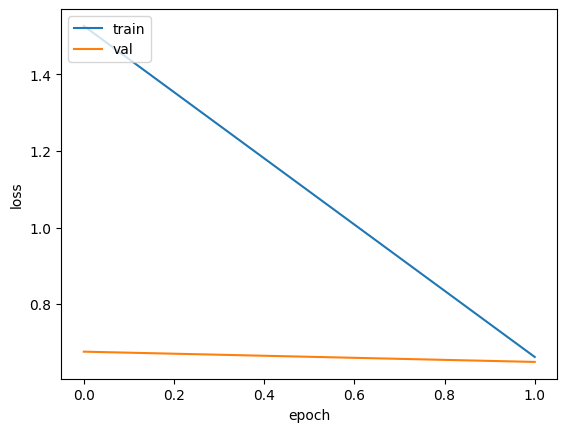


 Results Below
r:  -0.0505
model saved..
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 9s 298ms/step - loss: 0.5670 - val_loss: 0.5302
Epoch 2/2
10/10 [==============================] - 1s 101ms/step

Training Performance


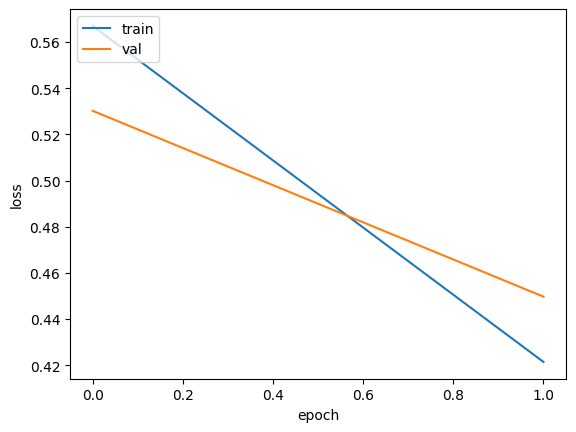


 Results Below
r:  -0.0035
model saved..
Epoch 1/2
31/31 [==============================] - 9s 301ms/step - loss: 0.5506 - val_loss: 0.6207
Epoch 2/2
10/10 [==============================] - 1s 102ms/step

Training Performance


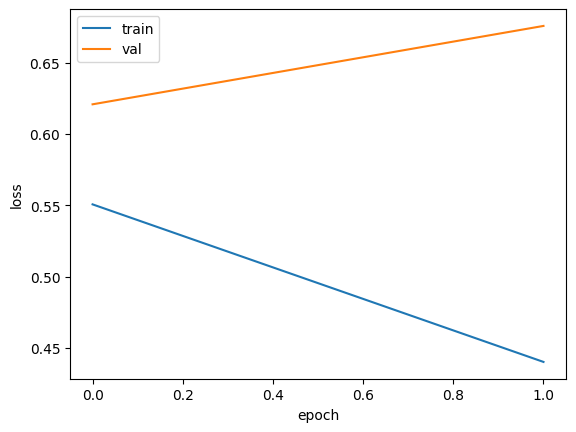


 Results Below
r:  0.0077
model saved..
Epoch 1/2
31/31 [==============================] - 9s 305ms/step - loss: 0.4690 - val_loss: 0.4367
Epoch 2/2
10/10 [==============================] - 1s 104ms/step

Training Performance


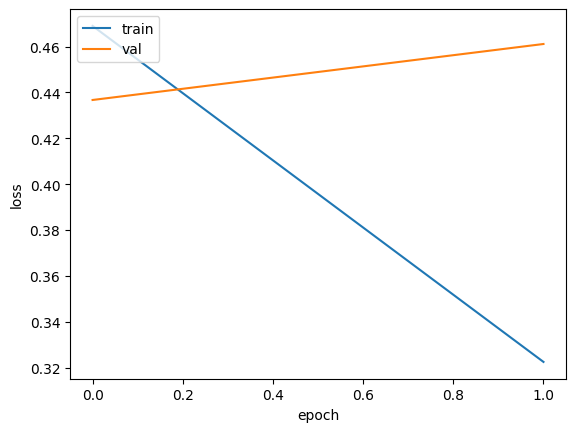


 Results Below
r:  -0.0316
model saved..
Epoch 1/2
31/31 [==============================] - 10s 311ms/step - loss: 1.4880 - val_loss: 0.7316
Epoch 2/2
10/10 [==============================] - 1s 104ms/step

Training Performance


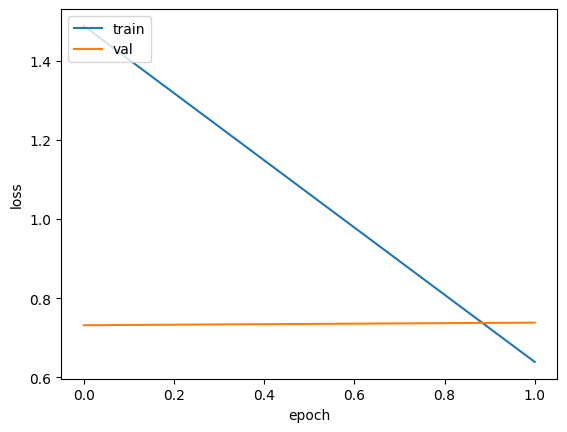


 Results Below
r:  0.0639
model saved..


In [ ]:
lstm, lstm_x_test = train_test_lstm(df, y_train_list, y_val_list)

# Generate Predictions

In [ ]:
from tensorflow.keras.models import load_model
import os

In [ ]:
def ml_predict(path, x_test):

    # Load the saved model for predictions
    loaded_model = joblib.load(path)

    ##### predict on test data using the loaded model
    y_pred = loaded_model.predict(x_test)

    return y_pred

In [ ]:
def lstm_predict(path, x_test):

  loaded_model = load_model(path)
  y_pred = loaded_model.predict(x_test)
  return y_pred

In [ ]:
from tqdm import tqdm

def transformer_predict(path, x_test, batch_size = 4, tokenizer = 'google/bigbird-roberta-base'):

    # Load the pretrained model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(path).to('cuda')
    tokenizer = AutoTokenizer.from_pretrained(tokenizer)

    predictions = []

    for i in tqdm(range(0, len(x_test), batch_size)):
        batch_texts = x_test[i:i+batch_size]

        # Tokenize the input texts in batch
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length = 4096).to('cuda')

        # Make predictions using the loaded model
        outputs = model(**inputs)
        logits = outputs.logits

        # Convert logits to predictions
        batch_predictions = torch.squeeze(logits).detach().cpu().numpy()

        predictions.extend(batch_predictions)

      del model

    return np.array(predictions)

In [ ]:
def get_all_model_paths(path):
  return os.lisdir(path)

In [ ]:
def all_ml_predictions(root_path, x_test, method, root = '/content/drive/MyDrive/Dissertation II/Models/'):

  paths = os.listdir(root_path)

  predictions = {}

  #eacon
  for path in paths:
    preds = ml_predict(f"{root}{method}/{path}", x_test)
    construct = path.split('_')[0]
    predictions[construct] = preds

  return predictions

In [ ]:
def all_lstm_predictions(root_path, x_test, method = 'lstm'):

  paths = os.listdir(root_path)

  predictions = {}

  #eacon
  for path in paths:
    preds = lstm_predict(f"{root}{method}/{path}", x_test)
    construct = path.split('_')[0]
    predictions[construct] = preds

  return predictions

In [ ]:
def all_transformer_predictions(root_path, x_test, method = 'transformer'):

  paths = os.listdir(root_path)

  predictions = {}

  #eacon
  for path in paths:
    print(path)
    preds = transformer_predict(f"{root}{method}/{path}", x_test)
    predictions[path] = preds

  return predictions


In [ ]:
root = '/content/drive/MyDrive/Dissertation II/Models/'
os.chdir(root)
os.listdir()

['transformers', 'bow', 'empath', 'lstm']

In [ ]:
model_roots = ['transformers', 'bow', 'empath', 'lstm']

In [ ]:
bow = all_ml_predictions('bow', bow_x_test, 'bow')

In [ ]:
bow.keys()

dict_keys(['E', 'A', 'O', 'C', 'N'])

In [ ]:
empath = all_ml_predictions('empath', empath_x_test, 'empath')

In [ ]:
empath.keys()

dict_keys(['E', 'A', 'O', 'C', 'N'])

In [ ]:
lstm_x_test = prepare_lstm(df)

lstm = all_lstm_predictions('lstm', lstm_x_test)

Preparing lstm...
length of results: 7215
 max length is: 4228
length of unique: 1687
x_train shape is : (1088, 4228)
10/10 [==============================] - 1s 60ms/step


In [ ]:
#rehsape each entry in lstm
for k,v in lstm.items():
  lstm[k] = v.ravel()
lstm.keys()

dict_keys(['E', 'A', 'O', 'C', 'N'])

In [ ]:
os.listdir('transformers')

['y_E_val', 'y_A_val', 'y_O_val', 'y_C_val', 'y_N_val']

In [ ]:
transformer = all_transformer_predictions('transformers', valid['Response'].tolist(), 'transformers')

y_E_val


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
100%|██████████| 75/75 [00:03<00:00, 24.57it/s]


y_A_val


100%|██████████| 75/75 [00:02<00:00, 31.41it/s]


y_O_val


100%|██████████| 75/75 [00:02<00:00, 30.63it/s]


y_C_val


100%|██████████| 75/75 [00:02<00:00, 31.17it/s]


y_N_val


100%|██████████| 75/75 [00:02<00:00, 30.91it/s]


In [ ]:
transformer.keys()

dict_keys(['y_E_val', 'y_A_val', 'y_O_val', 'y_C_val', 'y_N_val'])

In [ ]:
predictions = [bow, empath, lstm, transformer]
names = ['bow', 'empath', 'lstm', 'transformer']

frames = {}
for name, pred in zip(names, predictions):
  data = pd.DataFrame(pred)
  frames[name] = data

In [ ]:
save_dir = '/content/drive/MyDrive/Dissertation II/Data/ensemble_predictions'

In [ ]:
for key, value in frames.items():

    # Define the file path
    file_path = f'{save_dir}/{key}_valid_predictions.csv'

    # Save the DataFrame to a CSV file
    value.to_csv(file_path, index=False)

    print(f'Saved {file_path}')

Saved /content/drive/MyDrive/Dissertation II/Data/ensemble_predictions/bow_valid_predictions.csv
Saved /content/drive/MyDrive/Dissertation II/Data/ensemble_predictions/empath_valid_predictions.csv
Saved /content/drive/MyDrive/Dissertation II/Data/ensemble_predictions/lstm_valid_predictions.csv
Saved /content/drive/MyDrive/Dissertation II/Data/ensemble_predictions/transformer_valid_predictions.csv


# Load Valid Data for Training Ensemble

In [ ]:
import os
data_path = '/content/drive/MyDrive/Dissertation II/Data/ensemble_predictions/'
os.listdir(data_path)

['bow_valid_predictions.csv',
 'empath_valid_predictions.csv',
 'lstm_valid_predictions.csv',
 'transformer_valid_predictions.csv']

In [ ]:
ensemble_data = {}

for file in os.listdir(data_path):
  ensemble_data[file.split('_')[0]] = pd.read_csv(f'{data_path}{file}')

In [ ]:
ensemble_data.keys()

dict_keys(['bow', 'empath', 'lstm', 'transformer'])

In [ ]:
for k,v in ensemble_data.items():
  print(k, v.columns.tolist())

bow ['E', 'A', 'O', 'C', 'N']
empath ['E', 'A', 'O', 'C', 'N']
lstm ['E', 'A', 'O', 'C', 'N']
transformer ['y_E_val', 'y_A_val', 'y_O_val', 'y_C_val', 'y_N_val']


In [ ]:
#gather each targets predictions into a dataframe
# Initialize empty lists for each column label
columns = ensemble_data['bow'].columns.tolist()
columns_data = {label: [] for label in columns}
rename_scheme = {
        'y_E_val': 'E',
        'y_A_val': 'A',
        'y_O_val': 'O',
        'y_C_val': 'C',
        'y_N_val': 'N'
    }

ensemble_data['transformer'] = ensemble_data['transformer'].rename(columns = rename_scheme)

ensemble_feature_data = {}

for col in columns:
  ensemble_feature_data[col] = pd.DataFrame({key: data[col] for key, data in ensemble_data.items()})

In [ ]:
#bring in targets
target_cols = ['E_Scale_score',	'A_Scale_score',	'O_Scale_score','C_Scale_score',	'N_Scale_score']
col_mapping = {
    'E': 'E_Scale_score',
    'A': 'A_Scale_score',
    'O': 'O_Scale_score',
    'C': 'C_Scale_score',
    'N': 'N_Scale_score',
}

valid.reset_index(drop = True, inplace = True)

for original_col, target_col in col_mapping.items():
    ensemble_feature_data[original_col][target_col] = valid[target_col]

In [ ]:
ensemble_feature_data['E'].head()

,bow,empath,lstm,transformer,E_Scale_score
0,3.444896,3.482449,3.930387,3.900249,3.833333
1,3.701347,3.677626,3.202114,3.870011,4.083333
2,3.549687,3.478735,4.008515,3.371760,2.500000
3,3.517198,3.767189,3.017219,3.823763,4.500000
4,3.581894,3.511810,3.610610,4.045133,3.833333


# Ensemble Modeling

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
splits = {}
random_seed = 152
test_size = .1

#train test split

for k, v in ensemble_feature_data.items():
    # Extract features and target using list comprehensions
    features = v[[col for col in v.columns.tolist() if col not in target_cols]]
    target = v[[col for col in v.columns.tolist() if col in target_cols]]

    # Perform train-test split
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=test_size, random_state=random_seed)

    # Store the splits in the dictionary
    splits[k] = {
        'train': {'features': features_train, 'target': target_train},
        'test': {'features': features_test, 'target': target_test}
    }

In [ ]:
class RegressionDataset(Dataset):
    """Custom dataset for loading regression data."""
    def __init__(self, features, targets):
        """
        Args:
            features (numpy array or pandas DataFrame): Input features.
            targets (numpy array or pandas DataFrame): Targets/labels.
        """
        # If the data is in a pandas DataFrame, convert it to a numpy array
        if isinstance(features, pd.DataFrame):
            features = features.to_numpy()
        if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series):
            targets = targets.to_numpy()

        self.features = features.astype(np.float32)
        self.targets = targets.astype(np.float32)

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


In [ ]:
#example data structure
splits['E']['train']

{'features':           bow    empath      lstm  transformer
 109  3.404071  3.463853  2.884681     3.386967
 65   3.554865  3.513830  3.610030     3.574812
 45   3.383188  3.473149  3.600387     3.633208
 108  3.571999  3.609578  3.459382     3.887833
 293  3.546359  3.469723  3.577192     3.330405
 ..        ...       ...       ...          ...
 123  3.616638  3.546990  3.429910     3.204147
 128  3.196574  3.244887  3.304578     3.022156
 60   3.411904  3.379566  3.383777     2.586744
 199  3.236632  3.441713  3.434347     2.720415
 220  3.246955  3.268697  3.728991     2.927209
 
 [270 rows x 4 columns],
 'target':      E_Scale_score
 109       3.000000
 65        4.250000
 45        2.916667
 108       2.916667
 293       3.000000
 ..             ...
 123       3.166667
 128       2.750000
 60        2.833333
 199       2.000000
 220       3.583333
 
 [270 rows x 1 columns]}

In [ ]:
def convert_dict_to_numpy(data_dict, features=['bow', 'empath', 'lstm', 'transformer']):

    """
    convert features and targets to numpy
    """

    new_dict = {}

    for key, value in data_dict.items():
        # Extract features and target based on the specified feature columns
        train_feature_data = value['train']['features'].to_numpy()
        train_target_data = value['train']['target'].to_numpy()

        test_feature_data = value['test']['features'].to_numpy()
        test_target_data =  value['test']['target'].to_numpy()

        new_dict[key] = {'train': {'features': train_feature_data, 'target': train_target_data},
                         'test': {'features': test_feature_data, 'target': test_target_data}}

    return new_dict

In [ ]:
ensemble_data_w_target = convert_dict_to_numpy(splits)

In [ ]:
#convert dictionary of numpy arrays into datasets and dataloaders

def create_dataloaders(ensemble_data_w_target, batch_size=32, test_size=0.1, random_seed=42):
    """
    Create DataLoader instances for each entry in ensemble_data_w_target.

    """
    dataloaders = {}

    for k, v in ensemble_data_w_target.items():
        # Create RegressionDataset instances for training and validation sets
        dataset_train = RegressionDataset(v['train']['features'], v['train']['target'])
        dataset_val = RegressionDataset(v['test']['features'], v['test']['target'])

        # Create DataLoader instances for training and validation sets
        dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
        dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

        # Store DataLoader instances in the dictionary
        dataloaders[k] = {'train': dataloader_train, 'val': dataloader_val}

    return dataloaders

In [ ]:
#create dataloaders
dataloaders = create_dataloaders(ensemble_data_w_target)

In [ ]:
dataloaders['E']

{'train': <torch.utils.data.dataloader.DataLoader at 0x7d1b704160b0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7d1b70416dd0>}

In [ ]:
#model regression NN
class Regression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.1):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [ ]:
#instantiate model
#input size is the shape of the features
input_size = ensemble_data_w_target['E']['train']['features'].shape[1]
model = Regression(input_size=input_size, hidden_size=50, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

def train_NN(num_epochs, dataloaders):
    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set the model to training mode
            else:
                model.eval()   # Set the model to evaluation mode

            running_loss = 0.0

            # Iterate over data
            for inputs, targets in dataloaders[phase]:
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, targets.view(-1, 1))

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item()

            epoch_loss = running_loss / len(dataloaders[phase])
            print(f"Epoch {epoch + 1}, {phase.capitalize()} Loss: {epoch_loss}")

    return model


Regression(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (layer2): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
fit_model = train_NN(num_epochs=10, dataloaders=dataloaders['E'])

Epoch 1, Train Loss: 0.593859420882331
Epoch 1, Val Loss: 0.55635005235672
Epoch 2, Train Loss: 0.7362274395094978
Epoch 2, Val Loss: 0.5609390139579773
Epoch 3, Train Loss: 0.6902329987949796
Epoch 3, Val Loss: 0.5635301470756531
Epoch 4, Train Loss: 0.6920174525843726
Epoch 4, Val Loss: 0.5578666925430298
Epoch 5, Train Loss: 0.5745414429240756
Epoch 5, Val Loss: 0.5464907288551331
Epoch 6, Train Loss: 0.5960910386509366
Epoch 6, Val Loss: 0.5436241030693054
Epoch 7, Train Loss: 0.6561577551894717
Epoch 7, Val Loss: 0.5511044263839722
Epoch 8, Train Loss: 0.6648822956615024
Epoch 8, Val Loss: 0.5598127245903015
Epoch 9, Train Loss: 0.6512781414720747
Epoch 9, Val Loss: 0.5638800263404846
Epoch 10, Train Loss: 0.6895523038175371
Epoch 10, Val Loss: 0.5518661141395569


# next, use trained models to make predictions on test set, then use trained ensemble to make predictions on test set and evaluate performance